<a href="https://colab.research.google.com/github/sayan0506/Real-Time-Face-Recognition-Using-Siamese-Network-with-Triplet-Loss-in-Keras/blob/master/Copy_of_Face_Recognizer_using_imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Adding Face-Recognition-Master path to the system path
Adding Face-Recognition-Master path to the system path, for accessing necessary modules, else we can't access the cutom modules.

In [ ]:
import sys 

In [ ]:
sys.path.append('/content/gdrive/MyDrive/Face-Recognition-master')

Changing current working directory to /content/gdrive/MyDrive/Face-Recognition-master, if we wouldn't change that, the methods couldn't access the data files stored in the **Face-Recognition-Master** folder

In [ ]:
print('Current working directory becomes')
%cd /content/gdrive/MyDrive/Face-Recognition-master

Current working directory becomes
/content/gdrive/MyDrive/Face-Recognition-master


# Importing Modules

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
from keras import backend as K
import time
from multiprocessing.dummy import Pool
K.set_image_data_format('channels_first')
import cv2
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
import tensorflow as tf
from fr_utils import *
from inception_network import *
# from face_functions import *
from keras.models import load_model
from keras.utils.vis_utils import plot_model
# to obtain the encoding of the extracted faces
from fr_utils import img_to_encoding

# modules for accessing local webcam in collab
import capture_photo

# for  extracting faces from images
import face_data_generator
from google.colab.patches import cv2_imshow

# Defining the Triplet loss function

Triplet loss is used as cost function while compiling the Siamese network

In [ ]:
def triplet_loss_function(y_true,y_pred,alpha = 0.3):
	# reference image encoding
	anchor = y_pred[0]
	# positive encoding
	positive = y_pred[1]
	# negative encoding
	negative = y_pred[2]
	# calculating positive and negtive distances
	pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
	neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
	basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
	# triplet loss
	loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
	return loss

# Compiling the model

In [ ]:
# model object is instantiated with input layer shape
# nh = nw = 96, nc = 3
model = model(input_shape = (3,96,96))
# compiling the model, with 'Adam' optimizer, and loss = triplet
model.compile(optimizer = 'adam', loss = triplet_loss_function, metrics = ['accuracy'])

# Transfer Learning


* Loading weights from trained **Facenet model**

  Here, we are loading the weights of trained **Facenet model**, which is referenced and stored in 'weights' folder in the path '/content/gdrive/MyDrive/Face-Recognition-master'. So, we changed the current working directory 

* Loading the weights

  The weights of the pretrained model is stored in the weights folder of current loation. The weights are being loaded in the network architecture.

In [ ]:
load_weights_from_FaceNet(model)

In [ ]:
print('Weights are loaded successfully')

Weights are loaded successfully


In [ ]:
print('Model summary')
model.summary()
#plot_model(model)

Model summary
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_23 (ZeroPadding2 (None, 3, 102, 102)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 48, 48)   9472        zero_padding2d_23[0][0]          
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 64, 48, 48)   256         conv1[0][0]                      
________________________________________________________________________________

In [ ]:
print("Total Parameters of the model:", model.count_params())

Total Parameters of the model: 3743280


# Add facial images to the Database

1. Connecting collab environment with the local webcam.
2. A JS code is used to capture images of each person, when person is present infront of webcam, by pressing the capture button image is stored.
3. If a single face is detected in the image, then it's the valid entry
4. After capturing each image the face is cropped by **frontal_face_detector**, then using **68 facial landmark detction** of that face, and face_utils, dlib library face is aligned.
4. 10 sample faces of each person will be stored in the **facial_images** folder, with each of person_name.



In [ ]:
# Adding faces of person to database
''' 
def add_faces(person):
  # path of images
  path = 'Facial_images'
  # checking whether any folder with that person exista or not
  directory = os.path.join(path, person)
  if not os.path.exists(directory):
    os.makedirs(directory, exist_ok = True)
    print('no')
  # max 10 samples of each person is stored
  MAX_NUMBER_IMAGES = 2
  # counts number of images captured
  count = 0
  while count < MAX_NUMBER_IMAGES:
    filename = person+'.jpg'
    capture_photo.take_photo(filename)
    plt.imshow(plt.imread(filename))
    f_align = face_extraction.face_extraction(img)
    cv2.imwrite(os.path.join(directory, str(person + str(count))+'.jpg'), f_align)
    count = count + 1
    print(count)
'''

" \ndef add_faces(person):\n  # path of images\n  path = 'Facial_images'\n  # checking whether any folder with that person exista or not\n  directory = os.path.join(path, person)\n  if not os.path.exists(directory):\n    os.makedirs(directory, exist_ok = True)\n    print('no')\n  # max 10 samples of each person is stored\n  MAX_NUMBER_IMAGES = 2\n  # counts number of images captured\n  count = 0\n  while count < MAX_NUMBER_IMAGES:\n    filename = person+'.jpg'\n    capture_photo.take_photo(filename)\n    plt.imshow(plt.imread(filename))\n    f_align = face_extraction.face_extraction(img)\n    cv2.imwrite(os.path.join(directory, str(person + str(count))+'.jpg'), f_align)\n    count = count + 1\n    print(count)\n"

In [ ]:
while True:
  person = input("Enter person Name: ")
  face_data_generator.add_faces(person, 10)
  if int(input('Press 1 to proceed with another person, 0 to exit'))==0:
    break
# add_to_database(name)

Enter person Name: Hazra


<IPython.core.display.Javascript object>

Image count: 1


<IPython.core.display.Javascript object>

Image count: 2


<IPython.core.display.Javascript object>

Image count: 3


<IPython.core.display.Javascript object>

Image count: 4


<IPython.core.display.Javascript object>

Image count: 5


<IPython.core.display.Javascript object>

Image count: 6


<IPython.core.display.Javascript object>

Image count: 7


<IPython.core.display.Javascript object>

Image count: 8


<IPython.core.display.Javascript object>

Image count: 9


<IPython.core.display.Javascript object>

Image count: 10
Press 1 to proceed with another person, 0 to exit0


# Data Visualization

Sample faces of max 5 persons


<Figure size 360x360 with 0 Axes>

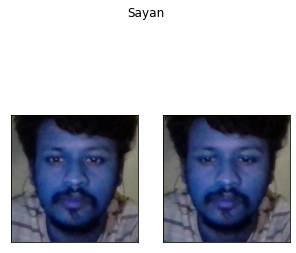

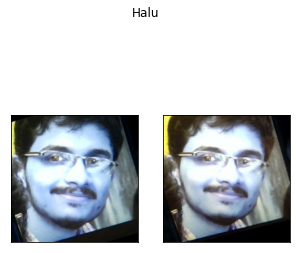

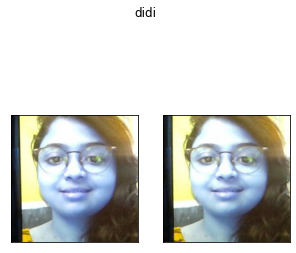

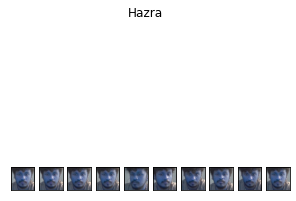

In [ ]:
print('Sample faces of max 5 persons')

path = 'Facial_images'

for c, name in enumerate(os.listdir(path)):
  fig = plt.figure(figsize=(5,5))
  fig.suptitle(name)
  if c<5:
    for i, image in enumerate(os.listdir(os.path.join(path, name))):
      fig.add_subplot(1, len(os.listdir(os.path.join(path, name))), i+1)
      plt.imshow(plt.imread(os.path.join(path, name, image)))
      plt.xticks([])
      plt.yticks([])
    plt.show()


# Obtaining Image Encoding

Creating dictionary to store the encoding array of the faces stored in the datavase, using the Siamese Network

In [ ]:
# Facial dictionary to store the encoding of the faces
face_database = {}
# path of the facial images
path = 'Facial_images'
for name in os.listdir(path):
  for image in os.listdir(os.path.join(path, name)):
    # extracting only the filename( splitting .jpg from file name)
    identity = os.path.splitext(os.path.basename(image))[0]
    face_database[identity] = fr_utils.img_to_encoding(os.path.join(path, name, image), model)

print(f'The encoded facial database shape\n {len(face_database)}')

The encoded facial database shape
 16


# Facial Recognition

In [ ]:
filename = 'frame.jpg'
capture_photo.take_photo(filename= filename)

<IPython.core.display.Javascript object>

'frame.jpg'

In [ ]:
def img_to_encoding1(image, model):
  # image = cv2.imread(image_path, 1)
  image = cv2.resize(image, (96, 96)) 
  img = image[...,::-1]
  img = np.around(np.transpose(img, (2,0,1))/255.0, decimals=12)
  x_train = np.array([img])
  embedding = model.predict_on_batch(x_train)
  return embedding


In [ ]:
video_file = 'VID20201118052735.mp4'
video_capture = cv2.VideoCapture(0)


In [ ]:

'''face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(video_file)

while True:
  ret, img = video_capture.read()
  frame = cv2.flip(img, 1)
  faces = face_cascade.detectMultiScale(frame, 1.3, 5)
  for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,0), 2)
    roi = frame[y:y+h, x:x+w]
    encoding = img_to_encoding1(roi, model)
    min_dist = 100
    identity = None

    for (name, encoded_image_name) in face_database.items():
      dist = np.linalg.norm(encoding - encoded_image_name)
      if (dist < min_dist):
        min_dist = dist
        identity = name
      print(identity, min_dist)  
      # print(f'Min dist: {min_dist}')
      # print(name[:-1])
    if min_dist < 1:
      cv2.putText(frame, identity[:-1], (x, y-50), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)
    #cv2.putText(frame, "Dist : "+str(min_dist), (x, y-50), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)
    
    cv2_imshow(frame)'''

'face_cascade = cv2.CascadeClassifier(\'haarcascade_frontalface_default.xml\')\nvideo_capture = cv2.VideoCapture(video_file)\n\nwhile True:\n  ret, img = video_capture.read()\n  frame = cv2.flip(img, 1)\n  faces = face_cascade.detectMultiScale(frame, 1.3, 5)\n  for (x, y, w, h) in faces:\n    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,0), 2)\n    roi = frame[y:y+h, x:x+w]\n    encoding = img_to_encoding1(roi, model)\n    min_dist = 100\n    identity = None\n\n    for (name, encoded_image_name) in face_database.items():\n      dist = np.linalg.norm(encoding - encoded_image_name)\n      if (dist < min_dist):\n        min_dist = dist\n        identity = name\n      print(identity, min_dist)  \n      # print(f\'Min dist: {min_dist}\')\n      # print(name[:-1])\n    if min_dist < 1:\n      cv2.putText(frame, identity[:-1], (x, y-50), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)\n    #cv2.putText(frame, "Dist : "+str(min_dist), (x, y-50), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)\n    \

Sayan0 0.09394848
Sayan1 0.09156875
Halu0 0.049673826
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931
Halu1 0.0418931


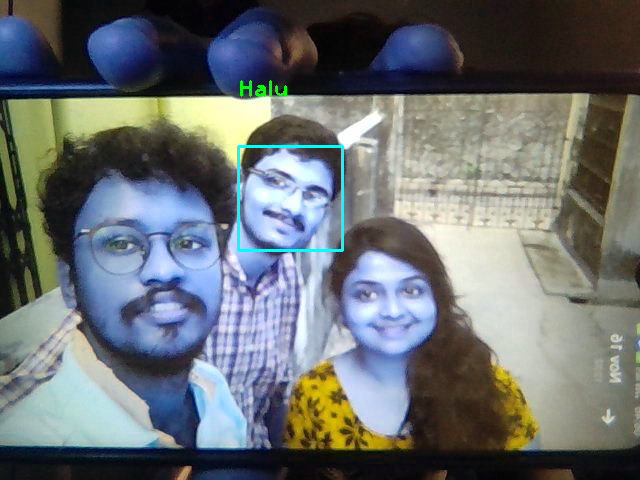

Sayan0 0.07148414
Sayan1 0.066915914
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793
Halu0 0.054141793


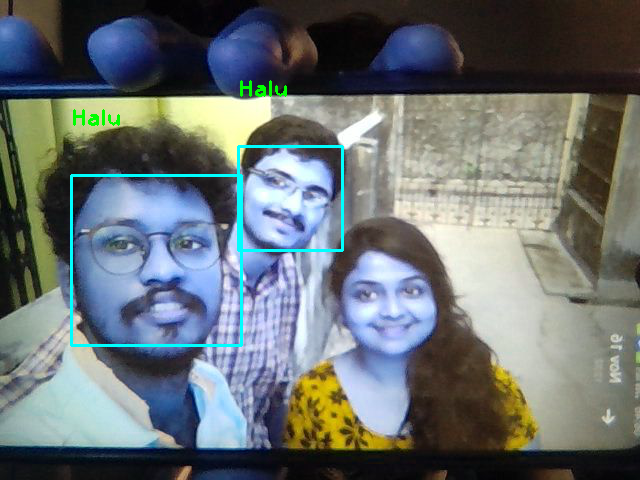

Sayan0 0.092084244
Sayan1 0.08835182
Halu0 0.05593751
Halu0 0.05593751
didi0 0.053809907
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008
didi1 0.05347008


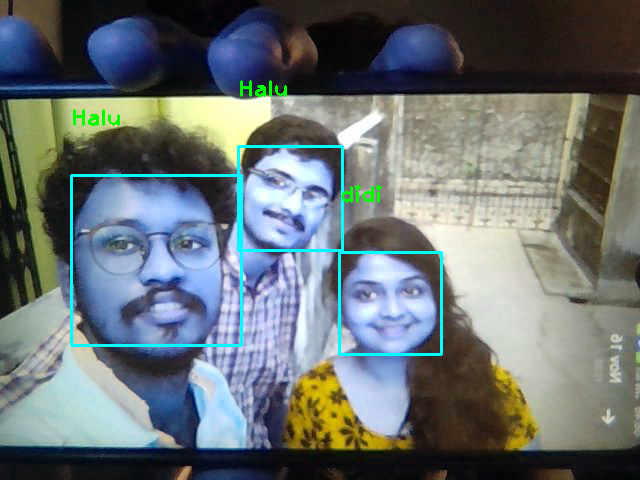

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#ret, img = video_capture.read()
img = plt.imread('frame.jpg')
frame = cv2.flip(img, 1)
faces = face_cascade.detectMultiScale(frame, 1.3, 5)
for (x, y, w, h) in faces:
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,0), 2)
  roi = frame[y:y+h, x:x+w]
  encoding = img_to_encoding1(roi, model)
  min_dist = 100
  identity = None

  for (name, encoded_image_name) in face_database.items():
    dist = np.linalg.norm(encoding - encoded_image_name)
    if (dist < min_dist):
      min_dist = dist
      identity = name
    print(identity, min_dist)  
    # print(f'Min dist: {min_dist}')
    # print(name[:-1])
  if min_dist < 1:
    cv2.putText(frame, identity[:-1], (x, y-50), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)
    #cv2.putText(frame, "Dist : "+str(min_dist), (x, y-50), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)
    
  cv2_imshow(frame)

In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.python.keras.backend import set_session
import numpy as np

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.15
session = tf.compat.v1.Session(config=config)
set_session(session)


class FacialExpressionModel(object):

    EMOTIONS_LIST = ["Angry", "Disgust",
                     "Fear", "Happy",
                     "Neutral", "Sad",
                     "Surprise"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        #self.loaded_model.compile()
        #self.loaded_model._make_predict_function()

    def predict_emotion(self, img):
        global session
        set_session(session)
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]


In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json) 

In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
<html>
  <head>
    <title>Face expression recognition</title>
  </head>
  <body>
    <img id="bg" width=1200px height=900px src="{{ url_for('video_feed') }}">
  </body>
</html>



In [ ]:
!pip install flask-ngrok

In [ ]:
def __init__(self):
  self.video = cv2.VideoCapture(0)

def __del__(self):
  self.video.release()

# returns camera frames along with bounding boxes and predictions
def get_frame(self):
  _, fr = self.video.read()
  gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
  faces = facec.detectMultiScale(gray_fr, 1.3, 5)

  for (x, y, w, h) in faces:
    fc = gray_fr[y:y+h, x:x+w]

    roi = cv2.resize(fc, (48, 48))
    # pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

    cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
    cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

  _, jpeg = cv2.imencode('.jpg', fr)
  return jpeg.tobytes()


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

# running the flask app
app = Flask(__name__)
# starting the ngrok when app is run
run_with_ngrok(app)
@app.route("/")
def index():
  return "<h1>Trail of Flask on Google Colab!</h1>"
@app.route('/test'):
def test_page():
  return "<h1>This is Test page!"

app.run()

SyntaxError: ignored

In [ ]:
import cv2
# from model import FacialExpressionModel
import numpy as np

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture(0)

    def __del__(self):
        self.video.release()

    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)

        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            # pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        _, jpeg = cv2.imencode('.jpg', fr)
        return jpeg.tobytes()


In [ ]:
import main

In [ ]:
import camera

In [ ]:
!python3 camera.py

In [ ]:
!python3 main.py

 * Serving Flask app "main" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from camera import VideoCamera


app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

def gen(camera):
    while True:
        frame = camera.get_frame()
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n\r\n')

@app.route('/video_feed')
def video_feed():
    return Response(gen(VideoCamera()),
                    mimetype='multipart/x-mixed-replace; boundary=frame')


app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

# running the flask app
app = Flask(__name__)
# starting the ngrok when app is run
run_with_ngrok(app)
@app.route("/")
def index():
  return "<h1>Trail of Flask on Google Colab!</h1>"
@app.route('/test')
def test_page():
  return "<h1>This is Test page!"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9aa833aa38ab.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
import cv2
from model import FacialExpressionModel
import numpy as np

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture('/home/rhyme/Desktop/Project/videos/facial_exp.mkv')

    def __del__(self):
        self.video.release()

    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)

        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        _, jpeg = cv2.imencode('.jpg', fr)
        return jpeg.tobytes()


In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.python.keras.backend import set_session
import numpy as np

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.15
session = tf.compat.v1.Session(config=config)
set_session(session)


class FacialRecognitionModel(object):

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        #self.loaded_model.compile()
        #self.loaded_model._make_predict_function()

In [ ]:
model = FacialRecognitionModel("model.json", "model_weights.h5")
